In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [2]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [3]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best parameters: {regression.best_params_}')

In [4]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values', xlim=(20, 350), ylim=(20, 350))
    plt.show()

In [5]:
X.rename(columns={'s1': 'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5':'ltg', 's6': 'glu'}, inplace=True)

In [6]:
df = pd.merge(X, y, right_index=True, left_index=True)

In [7]:
df.describe().applymap("{0:.5f}".format)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,152.13348
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318,87.00000
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792,211.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000


In [8]:
corr = df.corr()
corr

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


<AxesSubplot:>

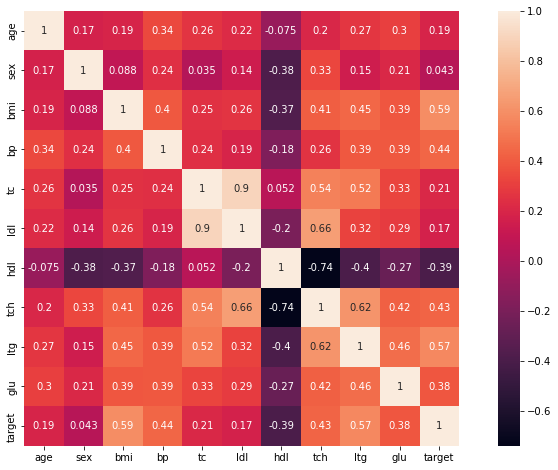

In [9]:
plt.figure(figsize = (14, 8))

sns.heatmap(corr, square=True, annot=True)

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(['target', 'ldl', 'tch'], axis='columns')

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=17)

Почнемо з одношарової моделі 

In [12]:
MLP = MLPRegressor(max_iter=100000)

In [13]:
MLP.fit(X_train, y_train)

MLPRegressor(max_iter=100000)

In [14]:
predicted = MLP.predict(X_test)

regression_score(y_test, predicted)

RMSE: 56.92929337907521
MSE: 3240.944444640817
R2: 0.45117338152345776
MAPE: 46.12514664676367


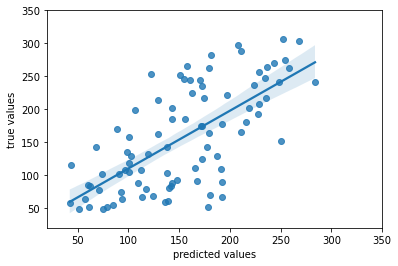

In [15]:
truepredplot(y_test, predicted)

In [17]:
predict = MLP.predict(X_train)

regression_score(y_train, predict)

RMSE: 52.9337936875296
MSE: 2801.9865141539485
R2: 0.5273828563910332
MAPE: 42.5711464793882


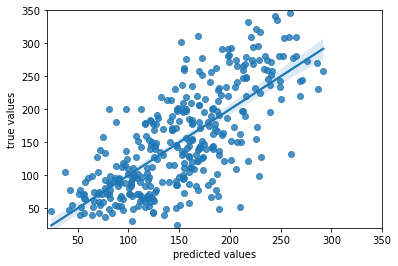

In [18]:
truepredplot(y_train, predict)

Значення майже однакові з <b>LinearRegression(fit_intercept=True)</b>

Спробуємо знайти значення alpha для кращого результату:

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 2, 5, 10]}

MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [20]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5, 10]},
             scoring='neg_mean_squared_error')

In [21]:
gridsearchscore(MLP_GS)

Best score: -2983.0429886432057, Best parameters: {'alpha': 0.1}


In [22]:
predict = MLP_GS.predict(X_test)

regression_score(y_test, predict)

RMSE: 56.85091290336532
MSE: 3232.0262979460294
R2: 0.45268359448057016
MAPE: 46.05277513981899


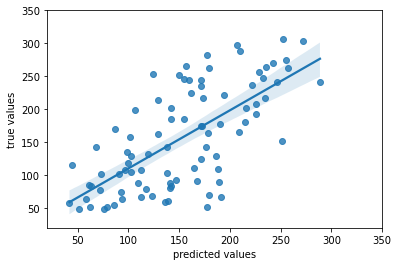

In [23]:
truepredplot(y_test, predict)

In [24]:
predict = MLP_GS.predict(X_train)

regression_score(y_train, predict)

RMSE: 53.055950047966306
MSE: 2814.933835492296
R2: 0.5251990036146521
MAPE: 42.701048464629416


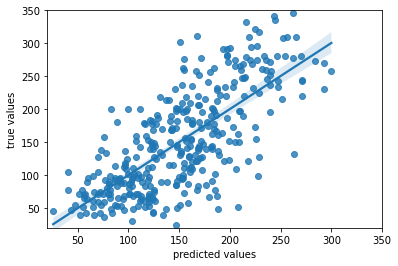

In [25]:
truepredplot(y_train, predict)

Значення метрик стало краще, але не сильно

Спробуємо змінити кількість нейронів у "скритому шарі" (поки що працюємо з одним):

In [26]:
parameters = {'hidden_layer_sizes': [(50, ), (100, ), (150, )]}

MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [27]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [28]:
gridsearchscore(MLP_GS)

Best score: -2988.87450360477, Best parameters: {'hidden_layer_sizes': (100,)}


In [29]:
predict = MLP_GS.predict(X_test)

regression_score(y_test, predict)

RMSE: 57.00509188567259
MSE: 3249.580500893975
R2: 0.4497109382044334
MAPE: 46.19987511339778


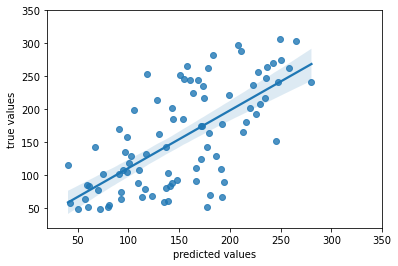

In [30]:
truepredplot(y_test, predict)

In [31]:
predict = MLP_GS.predict(X_train)

regression_score(y_train, predict)

RMSE: 52.80230952126072
MSE: 2788.08389077902
R2: 0.5297278420342328
MAPE: 42.49436056539917


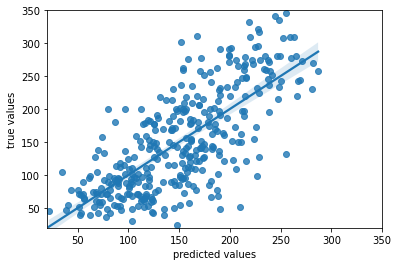

In [32]:
truepredplot(y_train, predict)

Отримали результати гірші на тестовій виборці, на тренувальній кращі, недостатнє значення alpha через що модель перенавчалася на навчальній вибірці

In [35]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 2, 5], \
            'hidden_layer_sizes': [(10, ), (50, ), (100, ), (150, )]}


MLP_GS = RandomizedSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [36]:
MLP_GS.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.1, 1, 2, 5],
                                        'hidden_layer_sizes': [(10,), (50,),
                                                               (100,),
                                                               (150,)]},
                   scoring='neg_mean_squared_error')

In [37]:
gridsearchscore(MLP_GS)

Best score: -2973.4675149183213, Best parameters: {'hidden_layer_sizes': (150,), 'alpha': 0.01}


In [38]:
predict = MLP_GS.predict(X_test)

regression_score(y_test, predict)

RMSE: 56.47760075678384
MSE: 3189.7193872426706
R2: 0.4598479131340134
MAPE: 46.7128274185618


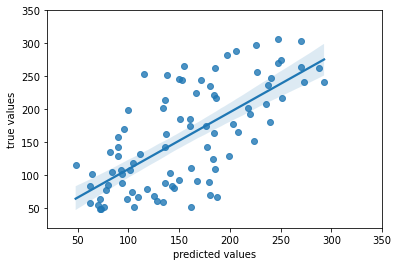

In [39]:
truepredplot(y_test, predict)

In [40]:
predict = MLP_GS.predict(X_train)

regression_score(y_train, predict)

RMSE: 50.62005054712607
MSE: 2562.389517393598
R2: 0.5677962015852929
MAPE: 40.437514294835005


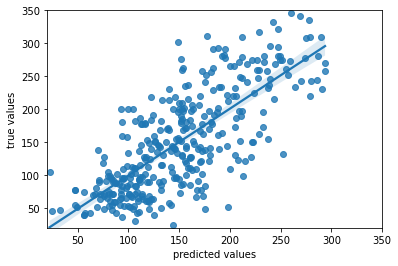

In [41]:
truepredplot(y_train, predict)

Значення метрик кращим не стали 

Спробуємо тоді двошарову модель (на цей раз перевіримо усі можливі варіанти)


In [42]:
parameters = {'alpha': [0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(100, 10), (10, 100), (100, 100), (10, 10)]}


MLP_GS = GridSearchCV(MLP, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [43]:
MLP_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(100, 10), (10, 100),
                                                (100, 100), (10, 10)]},
             scoring='neg_mean_squared_error')

In [44]:
gridsearchscore(MLP_GS)

Best score: -2956.799954549845, Best parameters: {'alpha': 1, 'hidden_layer_sizes': (10, 100)}


In [45]:
predict = MLP_GS.best_estimator_.predict(X_test)

regression_score(y_test, predict)

RMSE: 60.608044697121805
MSE: 3673.335082008314
R2: 0.3779516724134083
MAPE: 48.928325746216565


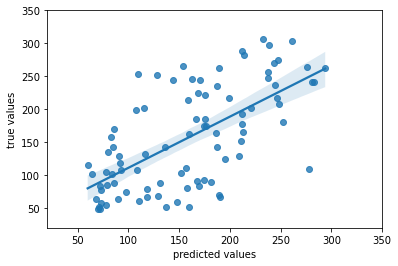

In [46]:
truepredplot(y_test, predict)

In [47]:
predict = MLP_GS.best_estimator_.predict(X_train)

regression_score(y_train, predict)

RMSE: 48.818202034746335
MSE: 2383.2168499053114
R2: 0.5980176440845199
MAPE: 38.427057953000066


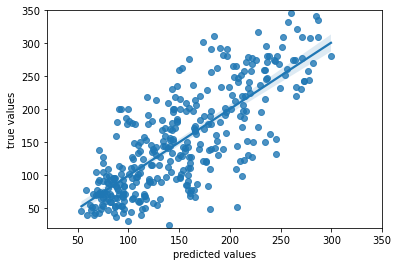

In [48]:
truepredplot(y_train, predict)

In [49]:
loss_curve = MLP_GS.best_estimator_.loss_curve_

In [50]:
MLP_GS.best_estimator_.loss_

1195.671143989018

Зі збільшенням шарів та кількості нейронів модель отримала ознаки перенавчання, також значення метрик кращими не стали 


Цікаво, що порівнянно з лінійною регресією значення MSE (а за ним і RMSE) гірше у нейронної мережі